In [1]:
import numpy as np

In [3]:
import tensorflow as tf

In [2]:
from google.colab import drive

In [10]:

from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [11]:
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
BATCH_SIZE=16
EPHOCHS=50
CHANNEL=3

In [12]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "//content/drive/MyDrive/basedata",
    shuffle=True,
    image_size=(IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size=BATCH_SIZE
)

Found 482 files belonging to 4 classes.


In [13]:
class_names=dataset.class_names

In [14]:
class_names

['Alluvial', 'Black', 'Desert', 'Red']

In [15]:
len(dataset)

31

In [16]:
train_size=0.8
len(dataset)*train_size

24.8

In [17]:
train_ds= dataset.take(24)
len(train_ds)

24

In [18]:
test_ds=dataset.skip(24)
len(test_ds)

7

In [19]:
val_size=0.1
len(dataset)*val_size


3.1

In [20]:
val_ds=test_ds.take(3)
len(val_ds)

3

In [21]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size= int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds,test_ds

In [22]:
train_ds, val_ds,test_ds=get_dataset_partition_tf(dataset)

In [23]:
len(train_ds)

24

In [24]:
len(val_ds)

3

In [25]:
len(test_ds)

4

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale=tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(256,256),
      layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [28]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [29]:
input_shape=(BATCH_SIZE,IMAGE_WIDTH,IMAGE_HEIGHT,CHANNEL)
n_class=4
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_class,activation='softmax'),




])
model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:

history=model.fit(
    train_ds,
    epochs=EPHOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
24/24 [==============================] - 58s 2s/step - loss: 1.3222 - accuracy: 0.3776 - val_loss: 1.3602 - val_accuracy: 0.2708
Epoch 2/50
24/24 [==============================] - 50s 2s/step - loss: 1.3146 - accuracy: 0.3776 - val_loss: 1.3590 - val_accuracy: 0.2708
Epoch 3/50
24/24 [==============================] - 51s 2s/step - loss: 1.2850 - accuracy: 0.3776 - val_loss: 1.3059 - val_accuracy: 0.2708
Epoch 4/50
24/24 [==============================] - 52s 2s/step - loss: 1.2554 - accuracy: 0.4141 - val_loss: 1.3612 - val_accuracy: 0.3333
Epoch 5/50
24/24 [==============================] - 49s 2s/step - loss: 1.2387 - accuracy: 0.4531 - val_loss: 1.1743 - val_accuracy: 0.5000
Epoch 6/50
24/24 [==============================] - 51s 2s/step - loss: 1.0716 - accuracy: 0.5391 - val_loss: 1.1242 - val_accuracy: 0.4792
Epoch 7/50
24/24 [==============================] - 51s 2s/step - loss: 1.0155 - accuracy: 0.5391 - val_loss: 1.0967 - val_accuracy: 0.4792
Epoch 8/50
24/24 [==

In [ ]:
scores=model.evaluate(test_ds)

4/4 [==============================] - 8s 945ms/step - loss: 0.3961 - accuracy: 0.8281


In [ ]:
scores

[0.3961024284362793, 0.828125]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 24}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

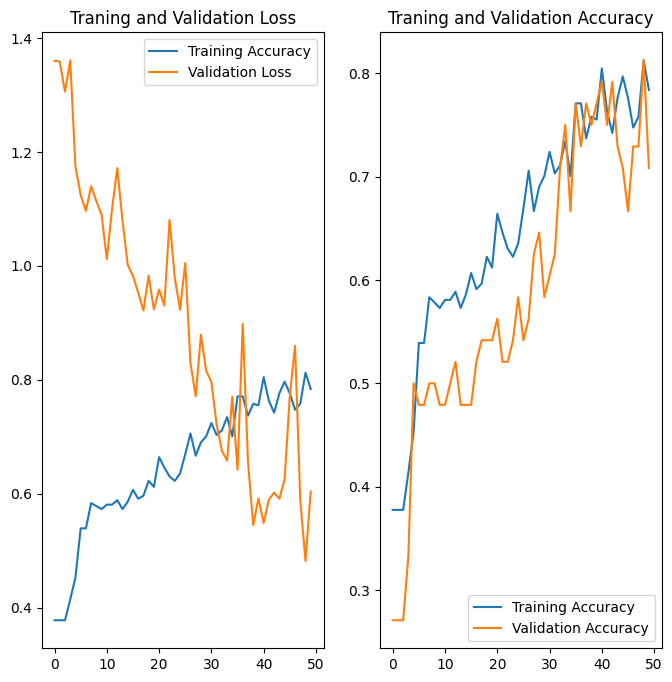

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPHOCHS),acc,label='Training Accuracy')
plt.plot(range(EPHOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Traning and Validation Accuracy")

plt.subplot(1,2,1)
plt.plot(range(EPHOCHS),acc,label='Training Accuracy')
plt.plot(range(EPHOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Traning and Validation Loss")
plt.show()


In [ ]:
np.argmax([1.3388006e-05,1.6526107e-08,2.5653921e-05,9.9996084e-01])

3

first image to predict
first images actual label: Desert
1/1 [==============================] - 1s 1s/step
predicticted label: Desert


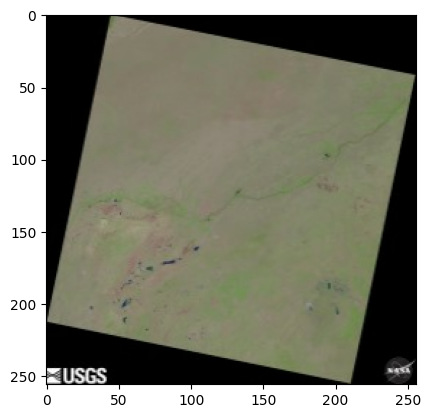

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  first_image=(images_batch[0].numpy().astype('uint8'))
  first_label=labels_batch[0].numpy()
  print ("first image to predict")
  plt.imshow (first_image)
  print("first images actual label:",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print('predicticted label:',class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions = model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]

  return predicted_class,

In [ ]:
import numpy as np

1/1 [==============================] - 0s 47ms/step


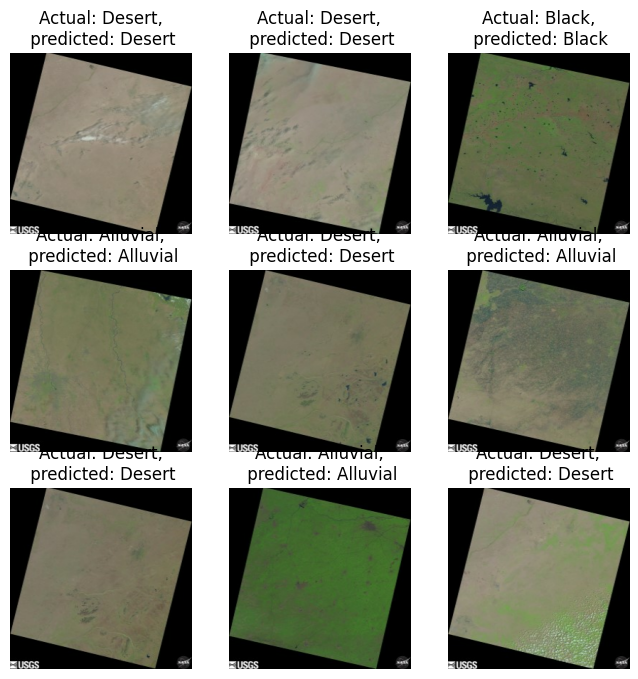

In [ ]:
plt.figure(figsize=(8,8))


for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class, = predict(model, images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n predicted: {predicted_class}")
    plt.axis('off')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_version=3

In [ ]:

model.save(f"/content/drive/MyDrive/model/{model_version}")